In [1]:
import numpy as np
import geopandas as gpd


import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

#from xhistogram.xarray import histogram
import dask.dataframe as dd
#import cartopy.crs as ccrs
#import cartopy.feature as cfeature

import mitequinox.utils as ut
from mitequinox.plot import *
#import mitequinox.parcels as pa
#from xmitgcm import llcreader

from scipy import signal
import scipy.ndimage as im
import scipy.optimize as opt

#from sympy import Symbol, pi, atan, factor, lambdify

import mitequinox.plot as pl
#import mitequinox.sigp as sp




In [6]:
def plot_maps(ds,colmap='RdBu_r',vlim=(-0.01,0.01),axes=111):
    
    crs = ccrs.Robinson()
    #fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(axes,projection=crs)
    ds.plot(vmax=vlim[1],vmin=vlim[0],y='lat_bin',ax=ax,
            transform=ccrs.PlateCarree(),cmap=colmap,label=False,
           cbar_kwargs={'fraction':0.02})
    ax.gridlines(draw_labels=True)
    return fig,ax

In [7]:
path = '/Users/zcaspar/codes/mit4320/'

### Low frequency : 

In [8]:
ds_1dl = xr.open_dataset(path+'energy_binned_dl1.0.nc') # Energy, 1°bins
ds_2dl = xr.open_dataset(path+'energy_binned_dl2.0.nc') # Energy, 2°bins

Text(0.5, 1.0, 'Energy ratio (1°x1° bins)')

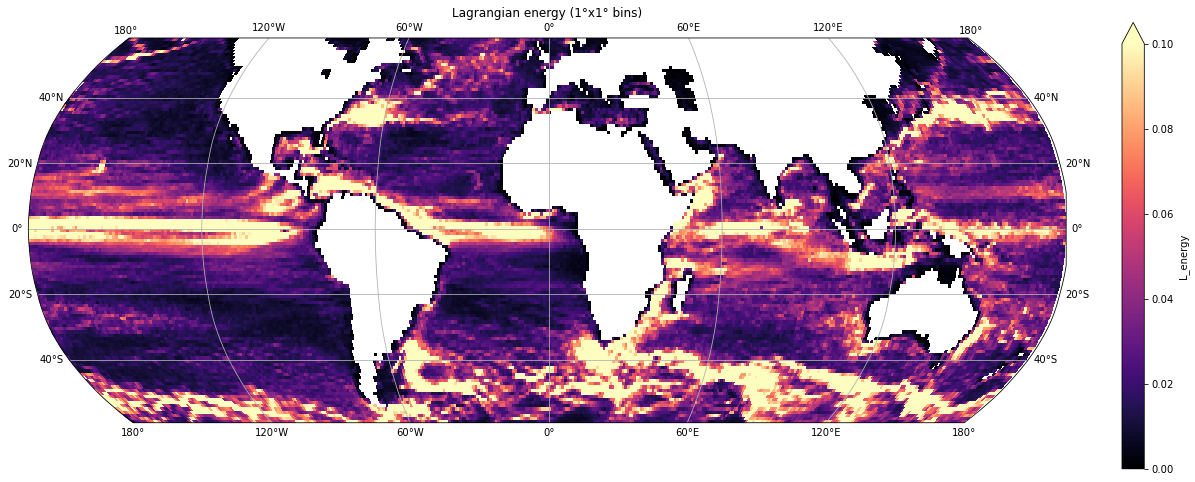

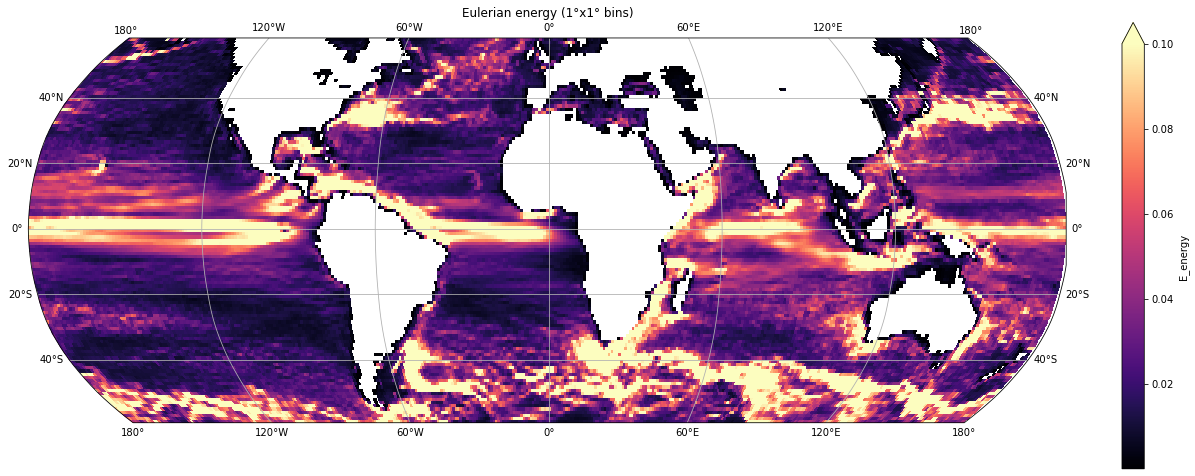

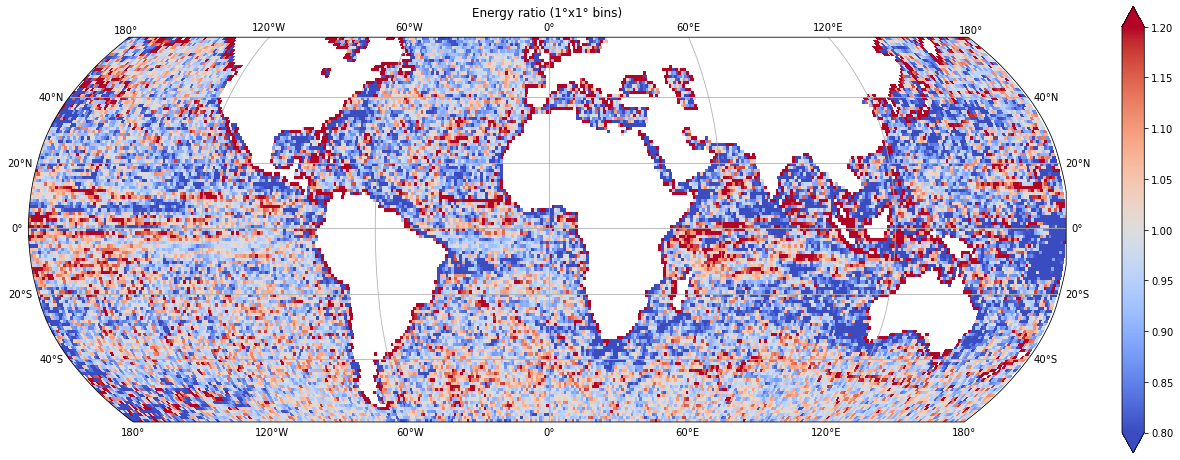

In [9]:
figsize = (20,20)
fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_1dl.L_energy,colmap='magma',vlim=(None,0.1))
ax.set_title('Lagrangian energy (1°x1° bins)')

figsize = (20,20)
fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_1dl.E_energy,colmap='magma',vlim=(None,0.1))
ax.set_title('Eulerian energy (1°x1° bins)')

figsize = (20,20)
fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_1dl.L_energy/ds_1dl.E_energy,colmap='coolwarm',vlim=(0.8,1.2))
ax.set_title('Energy ratio (1°x1° bins)')

### Variance from the complex amplitude

In [12]:
#Load data
ds_dl1 = xr.open_dataset(path+'energy_SSU_binned_dl1.0.nc') # Tidal variance, 1°bins
ds_dl2 = xr.open_dataset(path+'energy_SSU_binned_dl2.0.nc') # Tidal variance, 2°bins


In [24]:
ds_dl1['E_energy_low'] = ds_1dl['E_energy']
ds_dl1['L_energy_low'] = ds_1dl['L_energy']
ds_dl2['E_energy_low'] = ds_2dl['E_energy'].drop('E_count')
ds_dl2['L_energy_low'] = ds_2dl['L_energy'].drop('E_count')

In [13]:
# Area of interest
bbox_cal = [-125,35] #california
bbox_med = [4,40] # mediterranean sea
bbox_nwa = [115,-15] # North-west Australia
bbox_nea = [160,-15] # North-west Australia
bbox_swa = [120,-40] # South-west Australia
#bbox_neh = [-160, 35] # North-east Hawaii
bbox_eq = [-125,0] #equator
bbox_atl = [-10,-20]

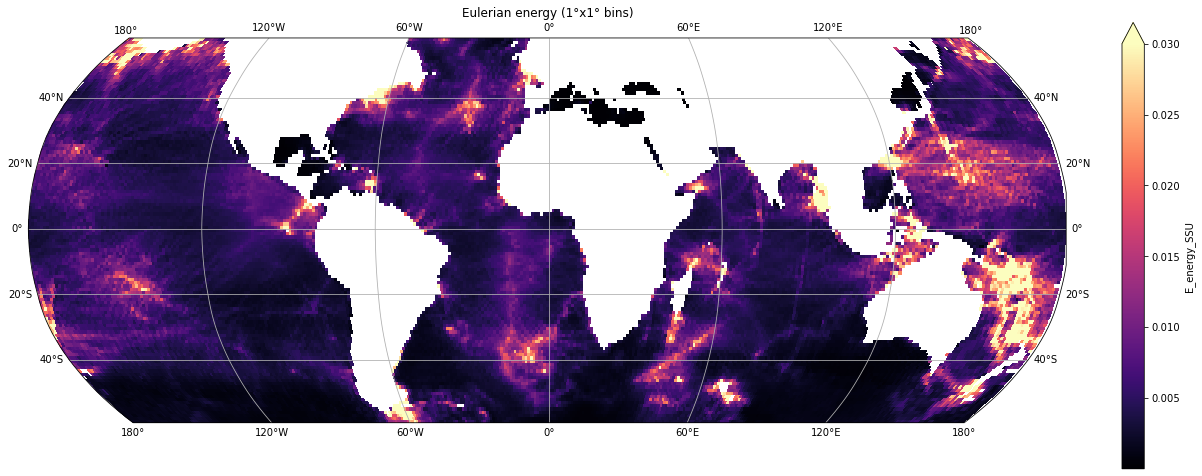

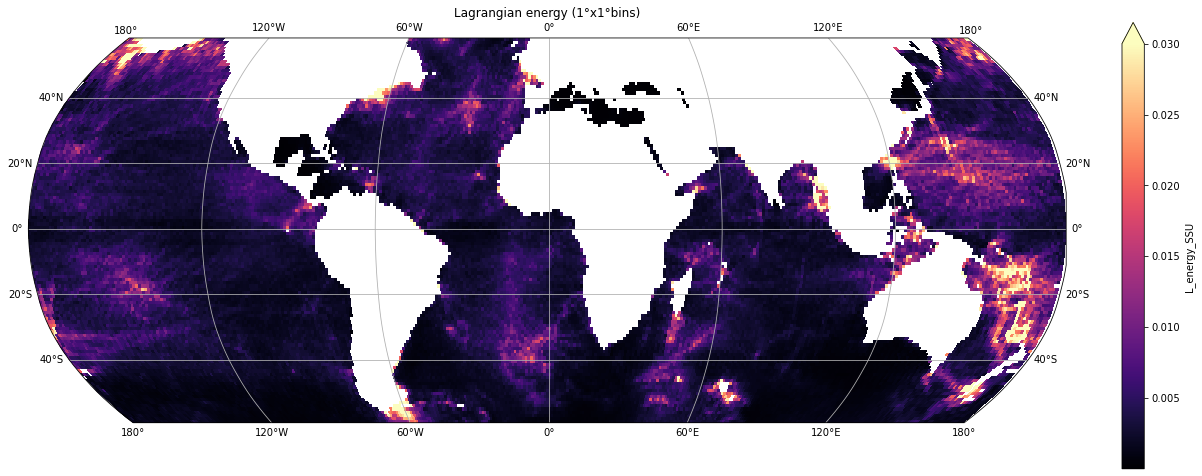

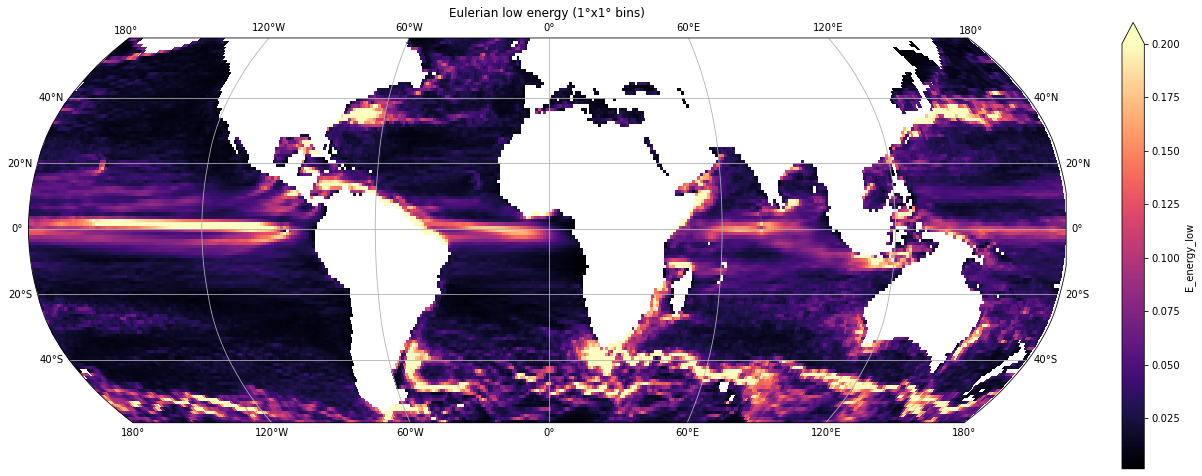

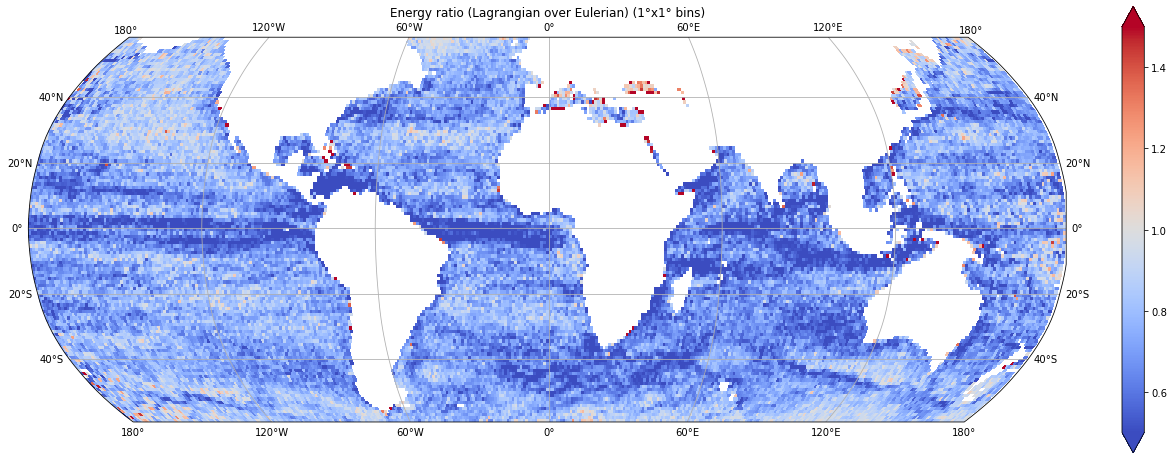

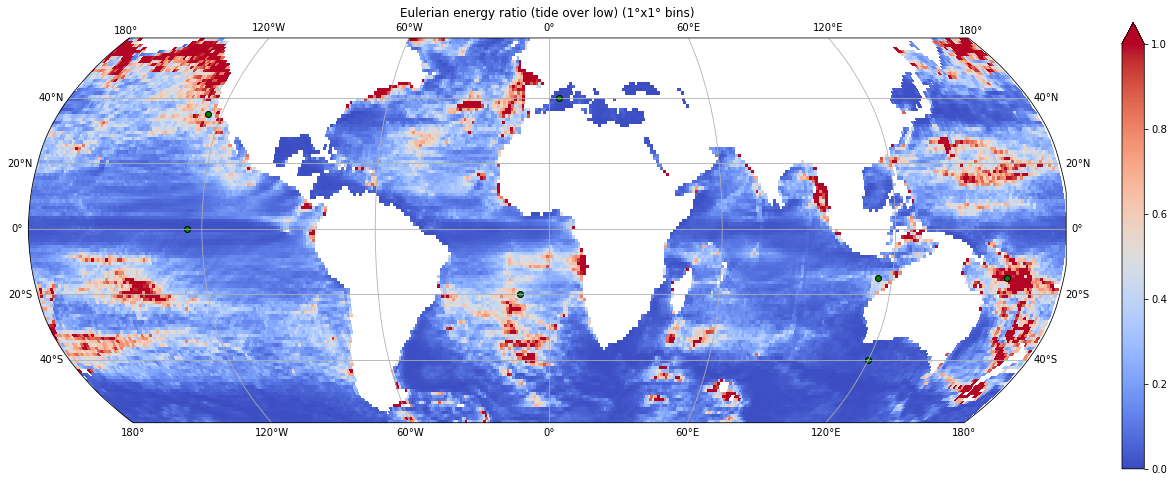

In [25]:
figsize = (20,20)
fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_dl1.E_energy_SSU.where(ds_dl1.waterdepth>=500),colmap='magma',vlim=(None,0.03))
ax.set_title('Eulerian energy (1°x1° bins)')

figsize = (20,20)
fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_dl1.L_energy_SSU.where(ds_dl1.waterdepth>=500),colmap='magma',vlim=(None,0.03))
ax.set_title('Lagrangian energy (1°x1°bins)')

figsize = (20,20)
fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_dl1.E_energy_low.where(ds_1dl.waterdepth>=500)
                   ,colmap='magma',vlim=(None,0.2))
ax.set_title('Eulerian low energy (1°x1° bins)')

figsize = (20,20)
fig = plt.figure(figsize=figsize)
fig,ax = plot_maps((ds_dl1.L_energy_SSU/ds_dl1.E_energy_SSU).where(ds_dl1.waterdepth>=500)
                   ,colmap='coolwarm',vlim=(0.5,1.5))
ax.set_title('Energy ratio (Lagrangian over Eulerian) (1°x1° bins)')

figsize = (20,20)
fig = plt.figure(figsize=figsize)
fig,ax = plot_maps((ds_dl1.E_energy_SSU/ds_dl1.E_energy_low).where(ds_dl1.waterdepth>=500),colmap='coolwarm',vlim=(0.,1.))

ax.set_title('Eulerian energy ratio (tide over low) (1°x1° bins)')
for bbox in [bbox_cal,bbox_nwa,bbox_nea,bbox_swa,bbox_med,bbox_eq,bbox_atl]:
    ax.scatter(bbox[0],bbox[1],c='g',edgecolor='k',transform=ccrs.PlateCarree())

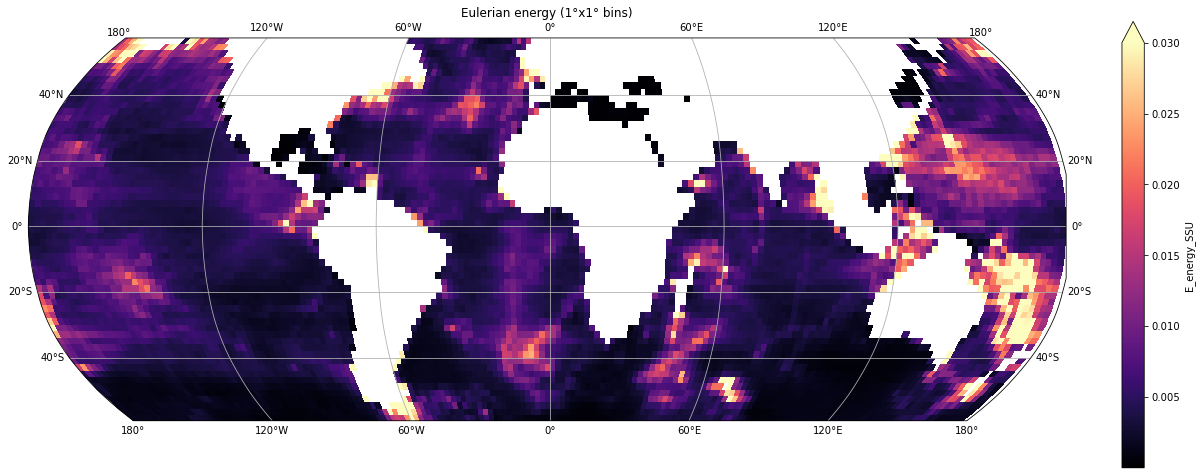

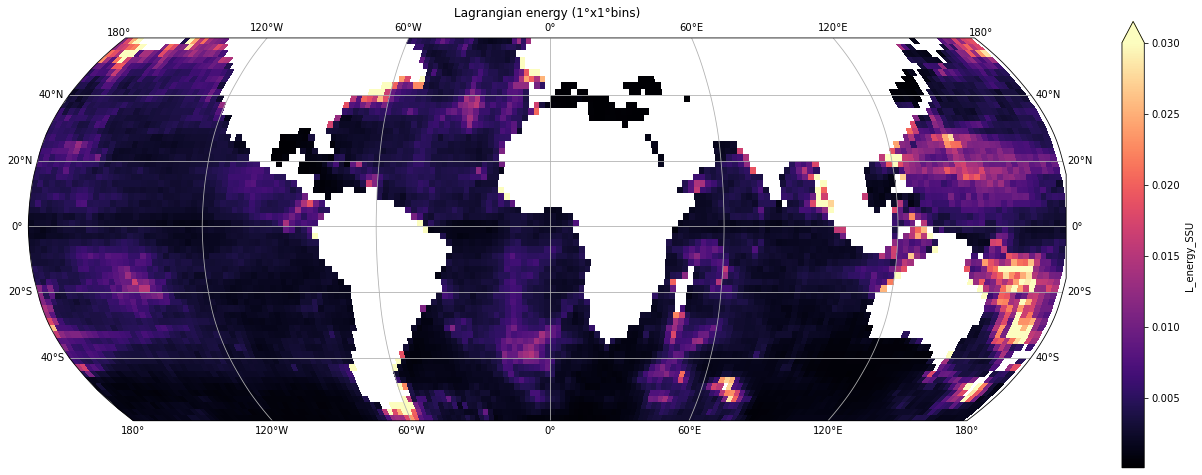

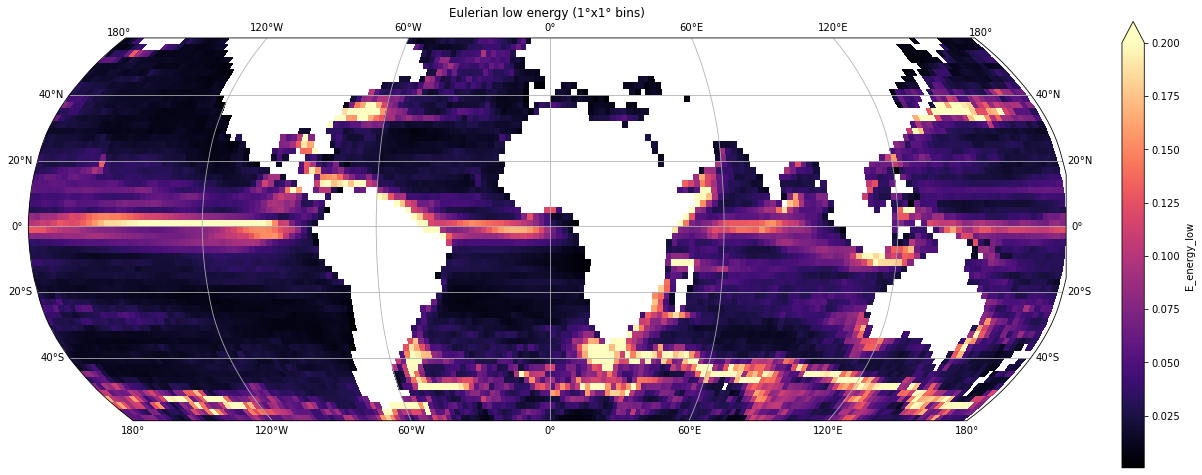

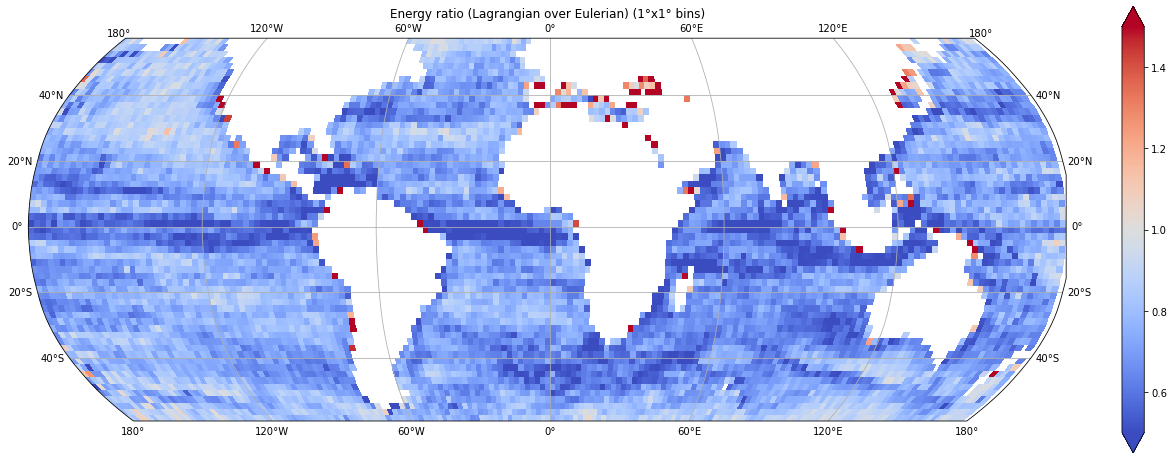

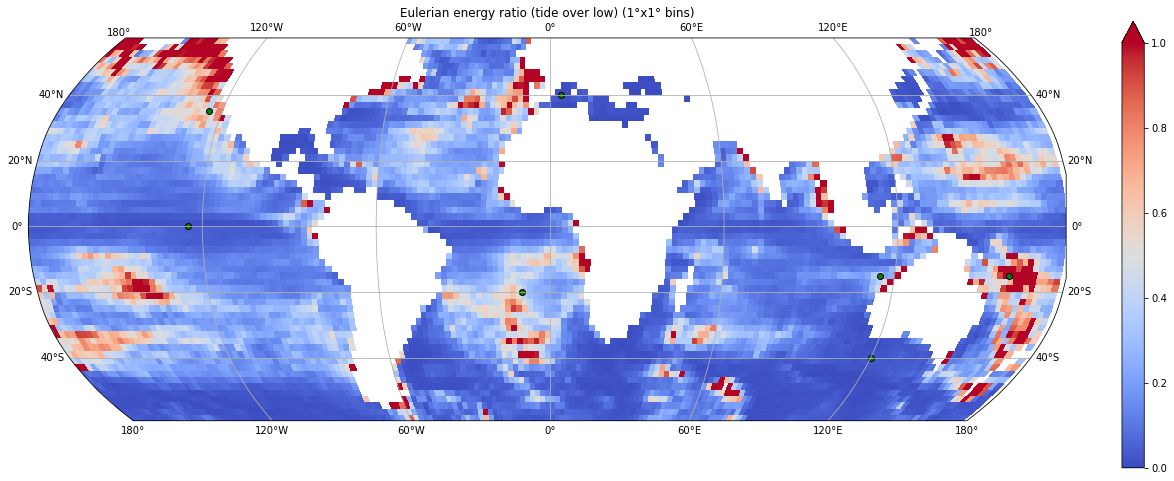

In [26]:
figsize = (20,20)
fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_dl2.E_energy_SSU.where(ds_dl2.waterdepth>=500),colmap='magma',vlim=(None,0.03))
ax.set_title('Eulerian energy (1°x1° bins)')

figsize = (20,20)
fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_dl2.L_energy_SSU.where(ds_dl2.waterdepth>=500),colmap='magma',vlim=(None,0.03))
ax.set_title('Lagrangian energy (1°x1°bins)')

figsize = (20,20)
fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_dl2.E_energy_low.where(ds_dl2.waterdepth>=500)
                   ,colmap='magma',vlim=(None,0.2))
ax.set_title('Eulerian low energy (1°x1° bins)')

figsize = (20,20)
fig = plt.figure(figsize=figsize)
fig,ax = plot_maps((ds_dl2.L_energy_SSU/ds_dl2.E_energy_SSU).where(ds_dl2.waterdepth>=500)
                   ,colmap='coolwarm',vlim=(0.5,1.5))
ax.set_title('Energy ratio (Lagrangian over Eulerian) (1°x1° bins)')

figsize = (20,20)
fig = plt.figure(figsize=figsize)
fig,ax = plot_maps((ds_dl2.E_energy_SSU/ds_dl2.E_energy_low).where(ds_dl2.waterdepth>=500),colmap='coolwarm',vlim=(0.,1.))

ax.set_title('Eulerian energy ratio (tide over low) (1°x1° bins)')
for bbox in [bbox_cal,bbox_nwa,bbox_nea,bbox_swa,bbox_med,bbox_eq,bbox_atl]:
    ax.scatter(bbox[0],bbox[1],c='g',edgecolor='k',transform=ccrs.PlateCarree())

### Variance from autocovariance

In [40]:
#Load data
path = '/Users/zcaspar/codes/mit4320/'
dsL_cov = xr.open_dataset(path+'binned_Lcov_uu_dl2_flag10.nc') # Lagrangian SSU, 2° bins
#dsL_flag10 = xr.open_dataset(path+'binned_Lcov_uu_dl2_flag10.nc') # Lagrangian SSU, 2° bins, without flagged depth
dsE_cov = xr.open_dataset(path+'binned_Ecov_uu_dl2.nc') # Eulerian SSU, 2° bins
#dsE_low = xr.open_dataset(path+'binned_Ecov_low_dl2.nc') # Eulerian SSU, bf, 2° bins


dsL_cov_1dl = xr.open_dataset(path+'binned_Lcov_uu_dl1_flag10.nc') # Lagrangian SSU, 1° bins
dsE_cov_1dl = xr.open_dataset(path+'binned_Ecov_uu_dl1.nc') # Eulerian SSU, 1° bins

In [56]:
ds_cov_dl1 = xr.merge([dsL_cov_1dl.rename({'rr':'L_rr','ri':'L_ri','count':'L_count'})
                       ,dsE_cov_1dl.rename({'rr':'E_rr','ri':'E_ri','count':'E_count'})]
                     ).rename({'lat_bins':'lat_bin','lon_bins':'lon_bin'})

ds_cov_dl2 = xr.merge([dsL_cov.rename({'rr':'L_rr','ri':'L_ri','count':'L_count'})
                       ,dsE_cov.rename({'rr':'E_rr','ri':'E_ri','count':'E_count'})]
                     ).rename({'lat_bins':'lat_bin','lon_bins':'lon_bin'})

ds_cov_dl1

<xarray.Dataset>
Dimensions:  (lat_bin: 119, lon_bin: 359, lags: 321)
Coordinates:
  * lat_bin  (lat_bin) float64 -59.5 -58.5 -57.5 -56.5 ... 55.5 56.5 57.5 58.5
  * lon_bin  (lon_bin) float64 -179.5 -178.5 -177.5 -176.5 ... 176.5 177.5 178.5
  * lags     (lags) float64 0.0 0.125 0.25 0.375 0.5 ... 39.62 39.75 39.88 40.0
Data variables:
    L_rr     (lat_bin, lon_bin, lags) float64 ...
    L_ri     (lat_bin, lon_bin, lags) float64 ...
    L_count  (lat_bin, lon_bin) float64 ...
    E_rr     (lags, lon_bin, lat_bin) float64 ...
    E_ri     (lags, lon_bin, lat_bin) float64 ...
    E_count  (lon_bin, lat_bin) int64 ...

In [41]:
# Subsampling Lagrangian data to  match Eulerian dataset
dsL_cov = dsL_cov.isel(lags=slice(0,None,3))#.sel(lon_bins=dsE_cov.lon_bins,lat_bins=dsE_cov.lat_bins,method='nearest')#.sel(lon_bins=slice(-180,180),lat_bins=slice(-60,60))
#dsL_flag10 = dsL_flag10.isel(lags=slice(0,None,3)).sel(lon_bins=dsE_cov.lon_bins,lat_bins=dsE_cov.lat_bins,method='nearest')#.sel(lon_bins=slice(-180,180),lat_bins=slice(-60,60))

dsL_cov_1dl = dsL_cov_1dl.isel(lags=slice(0,None,3))#.sel(lon_bins=dsE_cov_1dl.lon_bins,lat_bins=dsE_cov_1dl.lat_bins,method='nearest')#.sel(lon_bins=slice(-180,180),lat_bins=slice(-60,60))

In [42]:
print(dsL_cov,dsE_cov)
#print(dsE_low)

<xarray.Dataset>
Dimensions:   (lat_bins: 59, lon_bins: 179, lags: 321)
Coordinates:
  * lat_bins  (lat_bins) float64 -59.0 -57.0 -55.0 -53.0 ... 51.0 53.0 55.0 57.0
  * lon_bins  (lon_bins) float64 -179.0 -177.0 -175.0 ... 173.0 175.0 177.0
  * lags      (lags) float64 0.0 0.125 0.25 0.375 0.5 ... 39.62 39.75 39.88 40.0
Data variables:
    rr        (lat_bins, lon_bins, lags) float64 ...
    ri        (lat_bins, lon_bins, lags) float64 ...
    count     (lat_bins, lon_bins) float64 ... <xarray.Dataset>
Dimensions:   (lon_bins: 179, lat_bins: 59, lags: 321)
Coordinates:
  * lon_bins  (lon_bins) float64 -179.0 -177.0 -175.0 ... 173.0 175.0 177.0
  * lat_bins  (lat_bins) float64 -59.0 -57.0 -55.0 -53.0 ... 51.0 53.0 55.0 57.0
  * lags      (lags) float64 0.0 0.125 0.25 0.375 0.5 ... 39.62 39.75 39.88 40.0
Data variables:
    rr        (lags, lon_bins, lat_bins) float64 ...
    ri        (lags, lon_bins, lat_bins) float64 ...
    count     (lon_bins, lat_bins) int64 ...
Attributes:
    bi

In [57]:
def plot_maps(ds,colmap='RdBu_r',vlim=(-0.01,0.01),axes=111):
    
    crs = ccrs.Robinson()
    #fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(axes,projection=crs)
    ds.plot(vmax=vlim[1],vmin=vlim[0],y='lat_bin',ax=ax,
            transform=ccrs.PlateCarree(),cmap=colmap,label=False,
           cbar_kwargs={'fraction':0.02})
    ax.gridlines(draw_labels=True)
    return fig,ax

Text(0.5, 1.0, 'Energy ratio (Lagrangian over Eulerian) (1°x1° bins)')

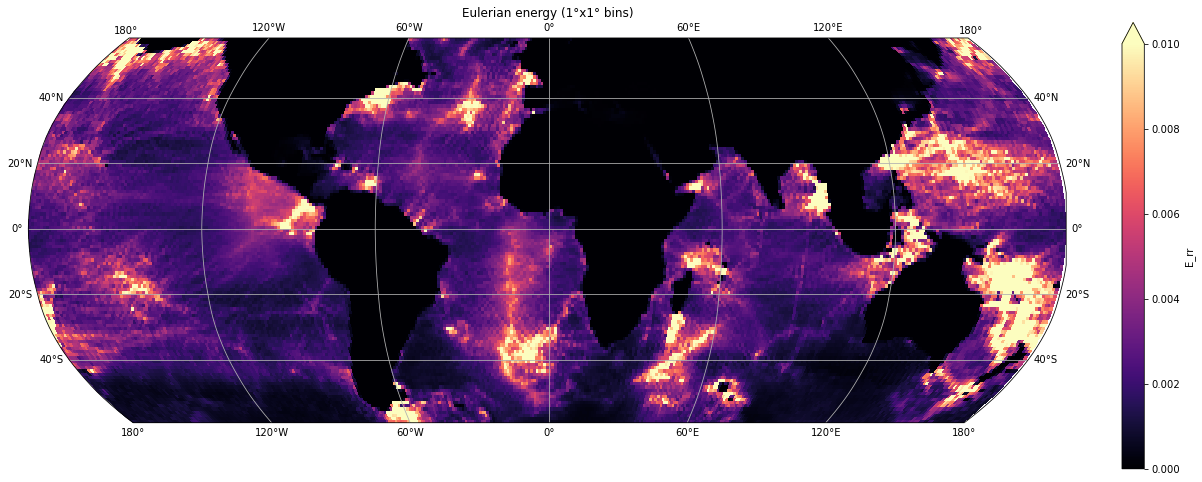

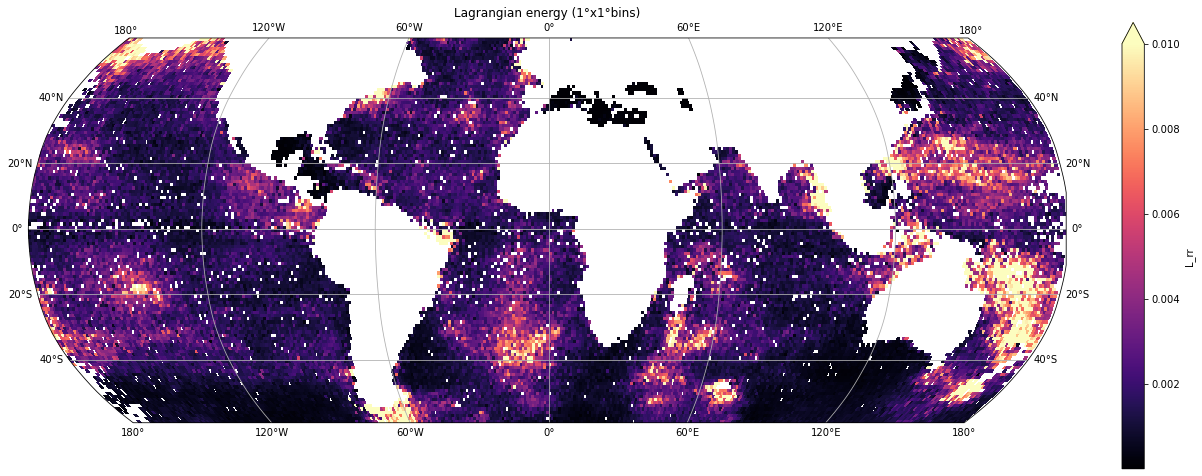

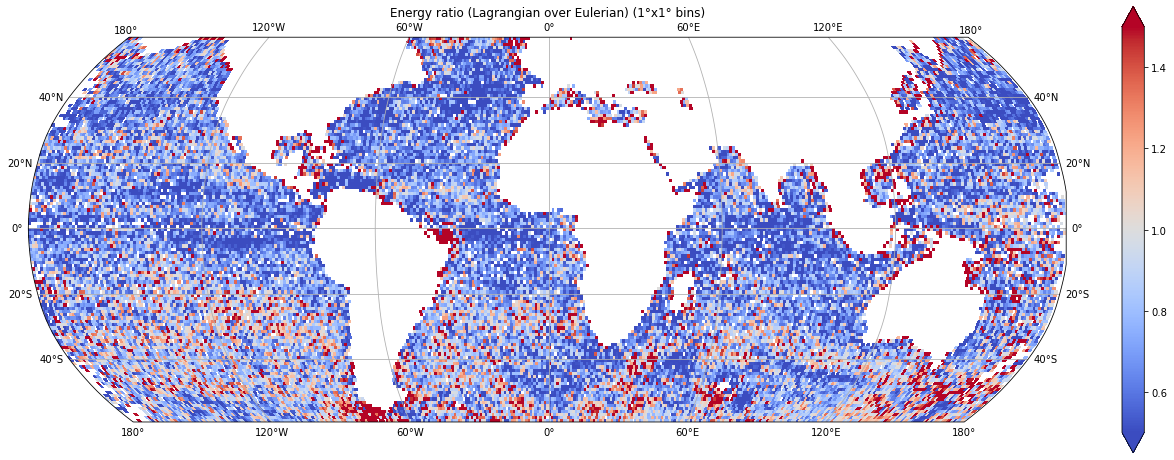

In [62]:
figsize = (20,20)
fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_cov_dl1.E_rr.isel(lags=0)
                   ,colmap='magma',vlim=(None,0.01)
                  )
ax.set_title('Eulerian energy (1°x1° bins)')

figsize = (20,20)
fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_cov_dl1.L_rr.isel(lags=0),colmap='magma',vlim=(None,0.01))
ax.set_title('Lagrangian energy (1°x1°bins)')

figsize = (20,20)
fig = plt.figure(figsize=figsize)
fig,ax = plot_maps((ds_cov_dl1.L_rr.isel(lags=0)/ds_cov_dl1.E_rr.isel(lags=0))
                   ,colmap='coolwarm',vlim=(0.5,1.5))
ax.set_title('Energy ratio (Lagrangian over Eulerian) (1°x1° bins)')

Text(0.5, 1.0, 'Energy ratio (Lagrangian over Eulerian) (1°x1° bins)')

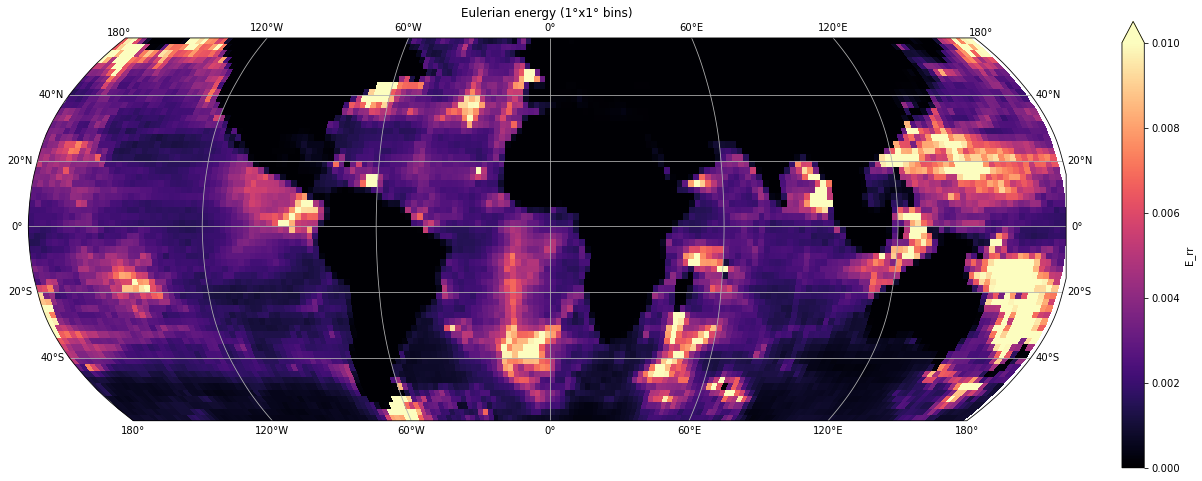

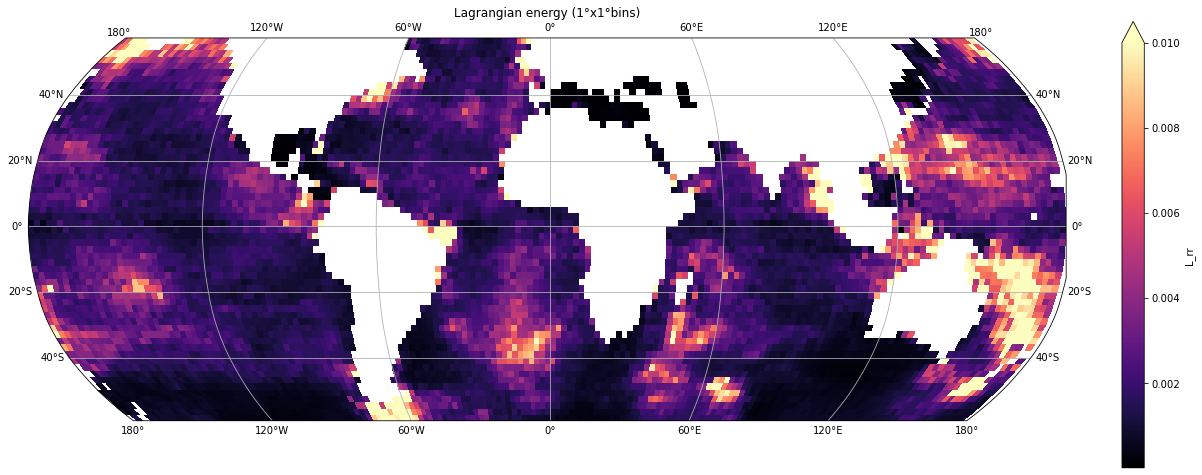

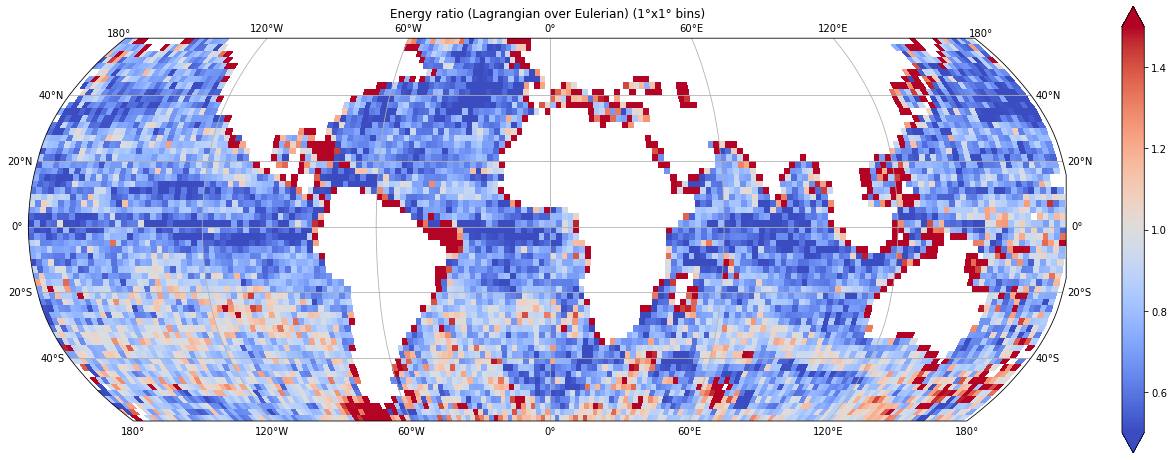

In [63]:
figsize = (20,20)
fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_cov_dl2.E_rr.isel(lags=0)
                   ,colmap='magma',vlim=(None,0.01)
                  )
ax.set_title('Eulerian energy (1°x1° bins)')

figsize = (20,20)
fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_cov_dl2.L_rr.isel(lags=0),colmap='magma',vlim=(None,0.01))
ax.set_title('Lagrangian energy (1°x1°bins)')

figsize = (20,20)
fig = plt.figure(figsize=figsize)
fig,ax = plot_maps((ds_cov_dl2.L_rr.isel(lags=0)/ds_cov_dl2.E_rr.isel(lags=0))
                   ,colmap='coolwarm',vlim=(0.5,1.5))
ax.set_title('Energy ratio (Lagrangian over Eulerian) (1°x1° bins)')

In [51]:
(dsE_cov.rr.isel(lags=0)/ds_dl2.E_energy_SSU)

<xarray.DataArray (lon_bins: 179, lat_bins: 59, lon_bin: 179, lat_bin: 59)>
array([[[[5.11662297e-01, 5.82664699e-01, 6.15592426e-01, ...,
          2.91175525e-02, 6.16940924e-02, 5.92725748e-02],
         [5.13264792e-01, 5.78806567e-01, 5.92514919e-01, ...,
          3.62641948e-02, 4.70099698e-02, 4.22914007e-02],
         [5.57687269e-01, 7.33093441e-01, 6.92994967e-01, ...,
          3.82790848e-02, 4.16096688e-02, 3.36936438e-02],
         ...,
         [5.38044716e-01, 4.02173160e-01, 2.52938003e-01, ...,
          4.46889729e-02, 3.31222662e-02, 5.90164943e-02],
         [4.90349672e-01, 4.41806154e-01, 3.99058485e-01, ...,
          2.59191759e-02, 4.80551887e-02, 4.82460633e-02],
         [4.80730766e-01, 4.48919471e-01, 4.18311626e-01, ...,
          1.88414309e-02, 4.13747895e-02, 4.39227344e-02]],

        [[4.30086980e-01, 4.89769331e-01, 5.17447326e-01, ...,
          2.44752843e-02, 5.18580830e-02, 4.98226327e-02],
         [4.31433986e-01, 4.86526308e-01, 4.98049111e-01, ...,
          3.04825236e-02, 3.95150787e-02, 3.55488003e-02],
         [4.68774101e-01, 6.16214926e-01, 5.82509429e-01, ...,
          3.21761757e-02, 3.49757582e-02, 2.83218005e-02],
...
         [6.35248035e+00, 4.74829882e+00, 2.98633858e+00, ...,
          5.27624961e-01, 3.91061446e-01, 6.96784317e-01],
         [5.78936390e+00, 5.21622984e+00, 4.71152509e+00, ...,
          3.06017420e-01, 5.67368533e-01, 5.69622115e-01],
         [5.67579729e+00, 5.30021396e+00, 4.93883928e+00, ...,
          2.22453294e-01, 4.88495712e-01, 5.18578286e-01]],

        [[6.34243878e+00, 7.22256693e+00, 7.63073086e+00, ...,
          3.60933950e-01, 7.64744650e-01, 7.34728120e-01],
         [6.36230291e+00, 7.17474248e+00, 7.34466781e+00, ...,
          4.49521954e-01, 5.82723912e-01, 5.24233701e-01],
         [6.91295291e+00, 9.08724426e+00, 8.59019353e+00, ...,
          4.74498030e-01, 5.15783122e-01, 4.17658041e-01],
         ...,
         [6.66946870e+00, 4.98523863e+00, 3.13535668e+00, ...,
          5.53953412e-01, 4.10575387e-01, 7.31553809e-01],
         [6.07825278e+00, 5.47651937e+00, 4.94662989e+00, ...,
          3.21287669e-01, 5.95680186e-01, 5.98046221e-01],
         [5.95901921e+00, 5.56469429e+00, 5.18528704e+00, ...,
          2.33553698e-01, 5.12871617e-01, 5.44455309e-01]]]])
Coordinates:
  * lon_bins  (lon_bins) float64 -179.0 -177.0 -175.0 ... 173.0 175.0 177.0
  * lat_bins  (lat_bins) float64 -59.0 -57.0 -55.0 -53.0 ... 51.0 53.0 55.0 57.0
    lags      float64 0.0
  * lon_bin   (lon_bin) float64 -179.0 -177.0 -175.0 ... 173.0 175.0 177.0
  * lat_bin   (lat_bin) float64 -59.0 -57.0 -55.0 -53.0 ... 51.0 53.0 55.0 57.0

AttributeError: 'Rectangle' object has no property 'vmax'

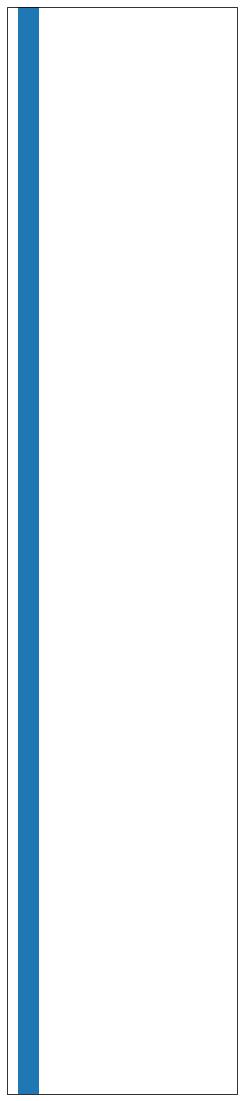

In [50]:
figsize = (20,20)
fig = plt.figure(figsize=figsize)
fig,ax = plot_maps((dsE_cov.rr.isel(lags=0)/ds_dl2.E_energy_SSU).where(dsE_cov.rr.isel(lags=0)!=0)
                   ,colmap='coolwarm',vlim=(0.5,1.5))
ax.set_title('Eulerian energy (2°x2° bins)')

figsize = (20,20)
fig = plt.figure(figsize=figsize)
fig,ax = plot_maps((dsL_cov.rr.isel(lags=0)/dsL_2dl.zonal_velocity_energy),colmap='coolwarm',vlim=(0.5,1.5))
ax.set_title('Lagrangian energy (2°x2°bins)')

figsize = (20,20)
fig = plt.figure(figsize=figsize)
fig,ax = plot_maps((dsL_flag10.rr.isel(lags=0)/dsL_2dl.zonal_velocity_energy),colmap='coolwarm',vlim=(0.5,1.5))
ax.set_title('Lagrangian energy (2°x2°bins)')

figsize = (20,20)
fig = plt.figure(figsize=figsize)
fig,ax = plot_maps((dsE_low.rr.isel(lags=0)/dsE_2dl.variance_low).where(dsE_low.rr.isel(lags=0)!=0)
                   ,colmap='coolwarm',vlim=(0.5,1.5))
ax.set_title('Eulerian low energy (2°x2° bins)')

In [12]:
#Load data
path = '/Users/zcaspar/codes/mit4320/'
dsL = xr.open_dataset(path+'binned_Lcov_uu_dl2_new.nc') # Lagrangian SSU, 2° bins
dsL_flag = xr.open_dataset(path+'binned_Lcov_uu_dl2_flag.nc') # Lagrangian SSU, 2° bins, without flagged depth
dsL_flag10 = xr.open_dataset(path+'binned_Lcov_uu_dl2_flag10.nc') # Lagrangian SSU, 2° bins, without flagged depth
dsE = xr.open_dataset(path+'binned_Ecov_dl2.nc') # Eulerian SSU, 2° bins
dsE_low = xr.open_dataset(path+'binned_Ecov_low_dl2.nc') # Eulerian SSU, bf, 2° bins

dsL_dl1 = xr.open_dataset(path+'binned_Lcov_dl1.nc') # Lagrangian SSU, 1° bins
dsE_dl1 = xr.open_dataset(path+'binned_Ecov_dl1.nc') # Eulerian SSU, 1° bins

dsL_vv = xr.open_dataset(path+'binned_Lcov_vv.nc') # Lagrangian SSV, 2° bins
dsE_vv = xr.open_dataset(path+'binned_Ecov_vv_dl2.nc') # Eulerian SSV, 2° bins


#SSUV spectra
E_SSUV = xr.open_dataset(path+'/E_SSUV.nc') #Eulerian
L_SSUV = xr.open_dataset(path+'/L_SSUV.nc') #Lagrangian

In [3]:
# Subsampling Lagrangian data to  match Eulerian dataset
dsL = dsL.isel(lags=slice(0,None,3)).sel(lon_bins=dsE.lon_bins,lat_bins=dsE.lat_bins,method='nearest')#.sel(lon_bins=slice(-180,180),lat_bins=slice(-60,60))
dsL_flag = dsL_flag.isel(lags=slice(0,None,3)).sel(lon_bins=dsE.lon_bins,lat_bins=dsE.lat_bins,method='nearest')#.sel(lon_bins=slice(-180,180),lat_bins=slice(-60,60))
dsL_flag10 = dsL_flag10.isel(lags=slice(0,None,3)).sel(lon_bins=dsE.lon_bins,lat_bins=dsE.lat_bins,method='nearest')#.sel(lon_bins=slice(-180,180),lat_bins=slice(-60,60))

In [29]:
# Area of interest
bbox_cal = [-125,35] #california
bbox_med = [4,40] # mediterranean sea
bbox_nwa = [115,-15] # North-west Australia
bbox_nea = [160,-15] # North-west Australia
bbox_swa = [120,-40] # South-west Australia
#bbox_neh = [-160, 35] # North-east Hawaii
bbox_eq = [-125,0] #equator
bbox_atl = [-10,-20]

In [30]:
dsE = dsE.where(dsE.rr!=0) # change 0 to nan (corresponding to land)
dsE_vv = dsE_vv.where(dsE_vv.rr!=0) # change 0 to nan (corresponding to land)
dsE_low = dsE_low.where(dsE_low.rr!=0) # change 0 to nan (corresponding to land)
dsE_dl1 = dsE_dl1.where(dsE_dl1.rr!=0)

In [31]:
dsL = dsL.interp({'lon_bins':dsE.lon_bins})
dsL_flag = dsL_flag.interp({'lon_bins':dsE.lon_bins})
dsL_flag10 = dsL_flag10.interp({'lon_bins':dsE.lon_bins})

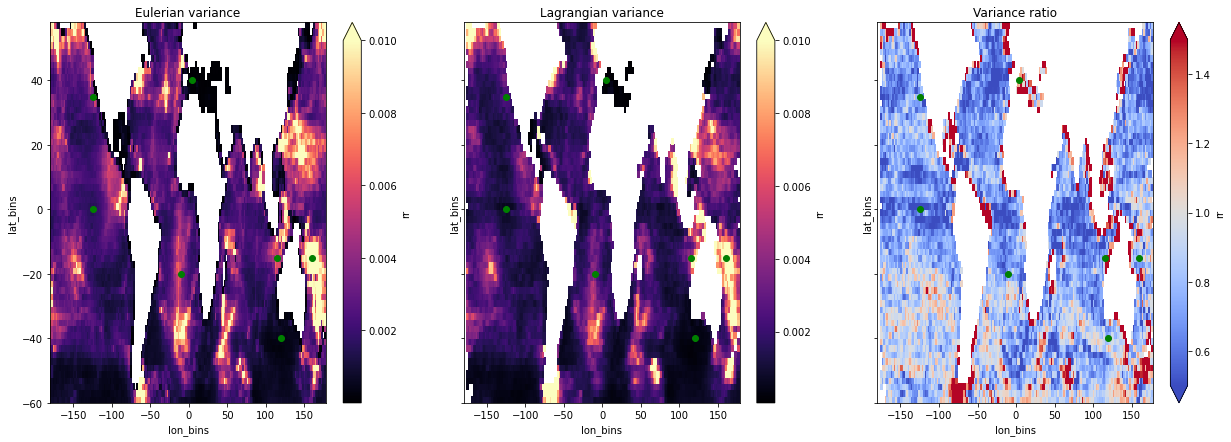

In [33]:
cmap ='magma'
fig,axs = plt.subplots(1,3,figsize=(21,7),sharey=True)
(dsE.isel(lags=0).rr).plot(ax=axs[0],vmax=0.01,cmap=cmap,y='lat_bins')
axs[0].set_title('Eulerian variance')
(dsL.isel(lags=0).rr).plot(ax=axs[1],vmax=0.01,cmap=cmap,y='lat_bins')
axs[1].set_title('Lagrangian variance')
#(dsE_low['rr'].isel(lags=0)).plot(y='lat_bins',cmap=cmap,vmax=0.1,ax=axs[2])
(dsL['rr'].isel(lags=0)/dsE['rr'].isel(lags=0)).plot(cmap='coolwarm',vmax=1.5,y='lat_bins',vmin=0.5,ax=axs[2])
axs[2].set_title('Variance ratio')

for bbox in [bbox_cal,bbox_nwa,bbox_nea,bbox_swa,bbox_med,bbox_eq,bbox_atl]:
    axs[0].scatter(bbox[0],bbox[1],c='g')
    axs[1].scatter(bbox[0],bbox[1],c='g')
    axs[2].scatter(bbox[0],bbox[1],c='g')
#plt.show()

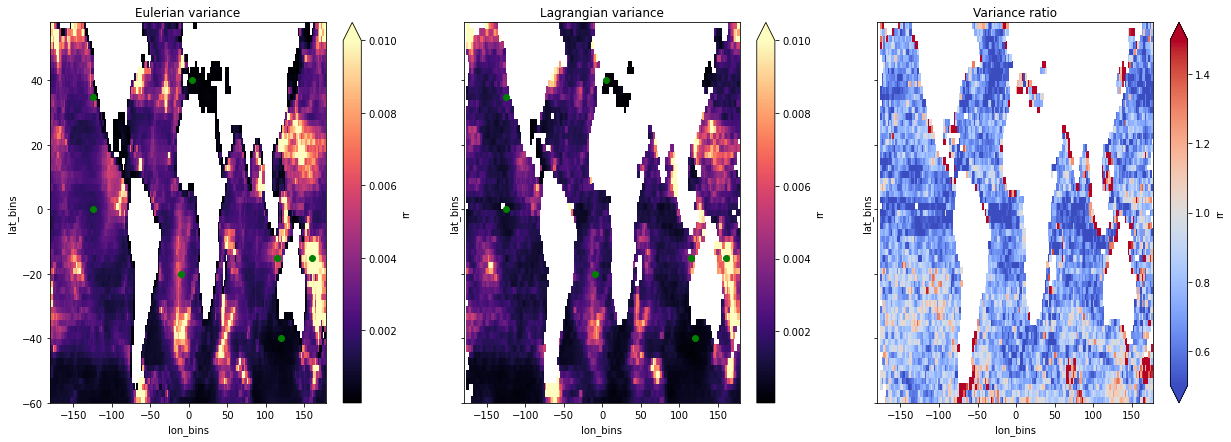

In [34]:
cmap ='magma'
fig,axs = plt.subplots(1,3,figsize=(21,7),sharey=True)
(dsE.isel(lags=0).rr).plot(ax=axs[0],vmax=0.01,cmap=cmap,y='lat_bins')
axs[0].set_title('Eulerian variance')
(dsL_flag.isel(lags=0).rr).plot(ax=axs[1],vmax=0.01,cmap=cmap,y='lat_bins')
axs[1].set_title('Lagrangian variance')
#(dsE_low['rr'].isel(lags=0)).plot(y='lat_bins',cmap=cmap,vmax=0.1,ax=axs[2])
(dsL_flag['rr'].isel(lags=0)/dsE['rr'].isel(lags=0)).plot(cmap='coolwarm',vmax=1.5,y='lat_bins',vmin=0.5,ax=axs[2])
axs[2].set_title('Variance ratio')

for bbox in [bbox_cal,bbox_nwa,bbox_nea,bbox_swa,bbox_med,bbox_eq,bbox_atl]:
    axs[0].scatter(bbox[0],bbox[1],c='g')
    axs[1].scatter(bbox[0],bbox[1],c='g')
#    axs[2].scatter(bbox[0],bbox[1],c='g')
plt.show()    
fig.savefig('/Users/zcaspar/codes/mit4320/var_maps.png')

Text(0.5, 1.0, 'Variance ratio')

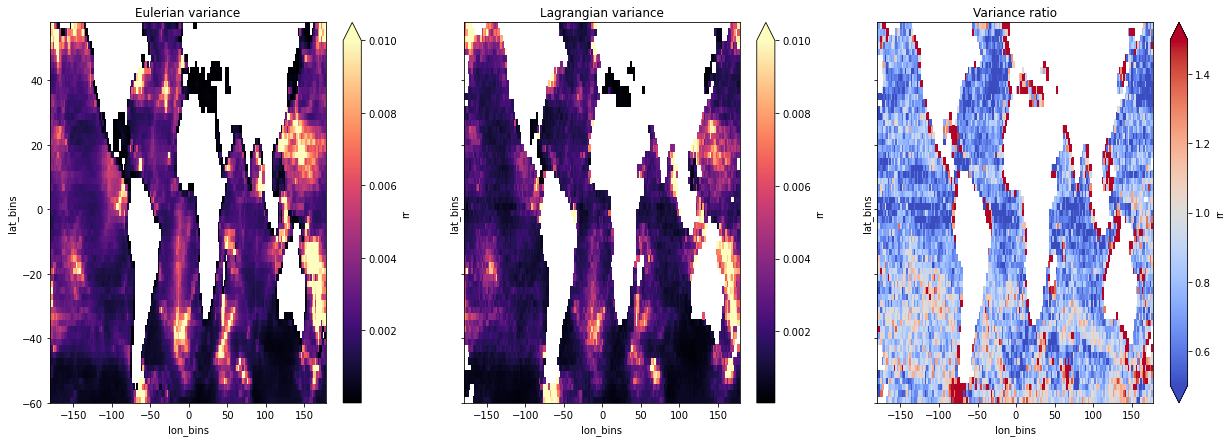

In [35]:
cmap ='magma'
fig,axs = plt.subplots(1,3,figsize=(21,7),sharey=True)
(dsE.isel(lags=0).rr).plot(ax=axs[0],vmax=0.01,cmap=cmap,y='lat_bins')
axs[0].set_title('Eulerian variance')
(dsL_flag10.isel(lags=0).rr).plot(ax=axs[1],vmax=0.01,cmap=cmap,y='lat_bins')
axs[1].set_title('Lagrangian variance')
#(dsE_low['rr'].isel(lags=0)).plot(y='lat_bins',cmap=cmap,vmax=0.1,ax=axs[2])
(dsL_flag10['rr'].isel(lags=0)/dsE['rr'].isel(lags=0)).plot(cmap='coolwarm',vmax=1.5,y='lat_bins',vmin=0.5,ax=axs[2])
axs[2].set_title('Variance ratio')

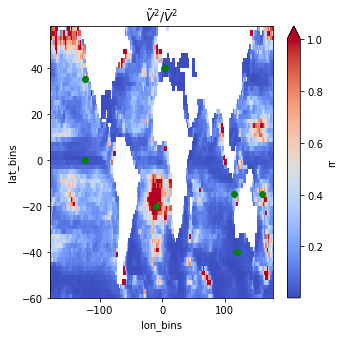

In [39]:
fig,ax = plt.subplots(figsize=(5,5))
(dsE['rr'].isel(lags=0)/dsE_low['rr'].isel(lags=0)).plot(cmap='coolwarm',y='lat_bins',vmax=1)
for bbox in [bbox_cal,bbox_nwa,bbox_nea,bbox_swa,bbox_med,bbox_eq,bbox_atl]:
    ax.scatter(bbox[0],bbox[1],c='g')
ax.set_title(r'$\tilde V^2/\bar V^2$')
fig.savefig('/Users/zcaspar/codes/mit4320/var_ratio.png')

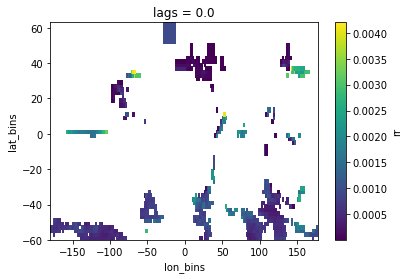

In [64]:
dsE.where(dsE_low['rr'].isel(lags=0)/dsE['rr'].isel(lags=0)>50,drop=True).rr.isel(lags=0).plot(y='lat_bins')

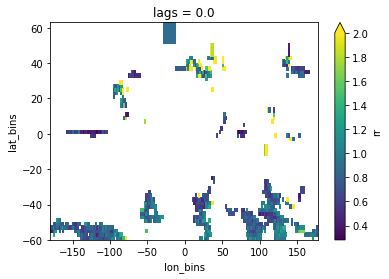

In [71]:
(dsL_flag10['rr'].isel(lags=0)/dsE['rr'].isel(lags=0)).where(dsE_low['rr'].isel(lags=0)/dsE['rr'].isel(lags=0)>50,drop=True).plot(vmax=2)

In [52]:
dsE.mean(['lat_bins','lon_bins'])/dsE.mean(['lat_bins','lon_bins']).isel(lags=0)

<xarray.Dataset>
Dimensions:  (lags: 321)
Coordinates:
  * lags     (lags) float64 0.0 0.125 0.25 0.375 0.5 ... 39.62 39.75 39.88 40.0
Data variables:
    rr       (lags) float64 1.0 0.9991 0.9965 0.9923 ... -0.2474 -0.256 -0.2644
    ri       (lags) float64 1.0 -3.163 -7.317 -11.45 ... -58.53 -57.45 -56.34
    count    (lags) float64 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0 1.0

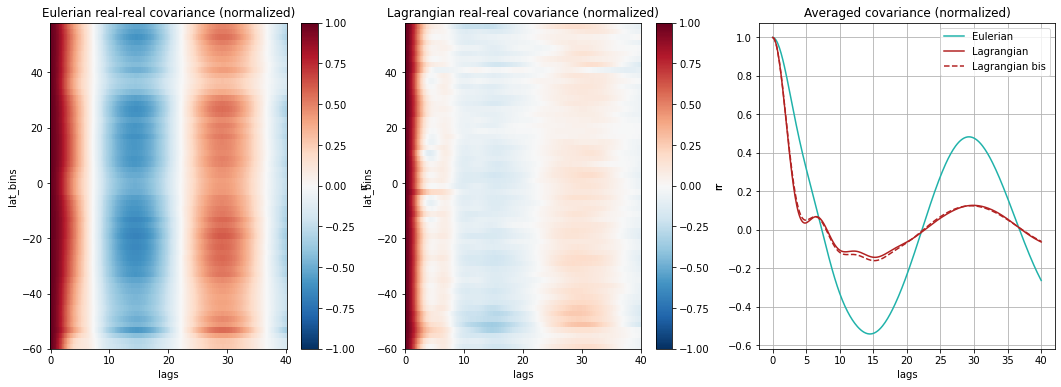

In [11]:
ce,cl = 'lightseagreen','firebrick'
fig,axs = plt.subplots(1,3,figsize=(18,6))
(dsE.mean('lon_bins')/dsE.mean('lon_bins').isel(lags=0)).rr.plot(y='lat_bins',ax=axs[0],vmax=1)
#(dsL.mean('lon_bins')/dsL.mean('lon_bins').isel(lags=0)).rr.plot(y='lat_bins',ax=axs[1],vmax=1)
(dsL_flag.mean('lon_bins')/dsL_flag.mean('lon_bins').isel(lags=0)).rr.plot(y='lat_bins',ax=axs[1],vmax=1)
(dsE.mean(['lat_bins','lon_bins'])/dsE.mean(['lat_bins','lon_bins']
                                           ).isel(lags=0)).rr.plot(c=ce,ax=axs[2],label='Eulerian')
(dsL_flag.mean(['lat_bins','lon_bins'])/dsL_flag.mean(['lat_bins','lon_bins']
                                                     ).isel(lags=0)).rr.plot(c=cl,ax=axs[2],label='Lagrangian')
(dsL_flag10.mean(['lat_bins','lon_bins'])/dsL_flag10.mean(['lat_bins','lon_bins']
                                                     ).isel(lags=0)).rr.plot(c=cl,ax=axs[2],linestyle='--',
                                                                             label='Lagrangian bis')
axs[0].set_title('Eulerian real-real covariance (normalized)')
axs[1].set_title('Lagrangian real-real covariance (normalized)')
axs[2].set_title('Averaged covariance (normalized)')
axs[2].grid();axs[2].legend()
#axs[2].set_title('Lagrangian real-real covariance (normalized) : coastal area removed')
fig.savefig('/Users/zcaspar/codes/mit4320/autocov.pdf')

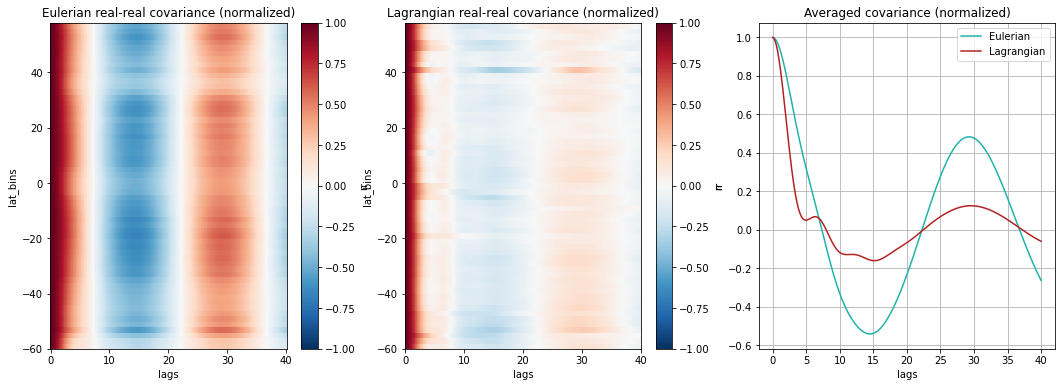

In [53]:
ce,cl = 'lightseagreen','firebrick'
fig,axs = plt.subplots(1,3,figsize=(18,6))
(dsE.mean('lon_bins')/dsE.mean('lon_bins').isel(lags=0)).rr.plot(y='lat_bins',ax=axs[0],vmax=1)
#(dsL.mean('lon_bins')/dsL.mean('lon_bins').isel(lags=0)).rr.plot(y='lat_bins',ax=axs[1],vmax=1)
(dsL_flag10.mean('lon_bins')/dsL_flag10.mean('lon_bins').isel(lags=0)).rr.plot(y='lat_bins',ax=axs[1],vmax=1)
(dsE.mean(['lat_bins','lon_bins'])/dsE.mean(['lat_bins','lon_bins']
                                           ).isel(lags=0)).rr.plot(c=ce,ax=axs[2],label='Eulerian')
(dsL_flag10.mean(['lat_bins','lon_bins'])/dsL_flag10.mean(['lat_bins','lon_bins']
                                                     ).isel(lags=0)).rr.plot(c=cl,ax=axs[2],label='Lagrangian')
axs[0].set_title('Eulerian real-real covariance (normalized)')
axs[1].set_title('Lagrangian real-real covariance (normalized)')
axs[2].set_title('Averaged covariance (normalized)')
axs[2].grid();axs[2].legend()
#axs[2].set_title('Lagrangian real-real covariance (normalized) : coastal area removed')
#fig.savefig('/Users/zcaspar/codes/mit4320/autocov.pdf'

Text(0.5, 1.0, 'Lagrangian real-imag covariance : coastal area removed')

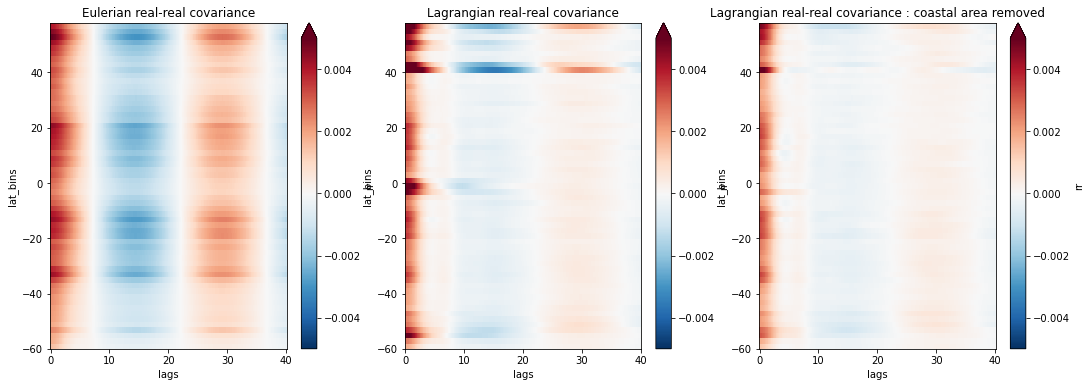

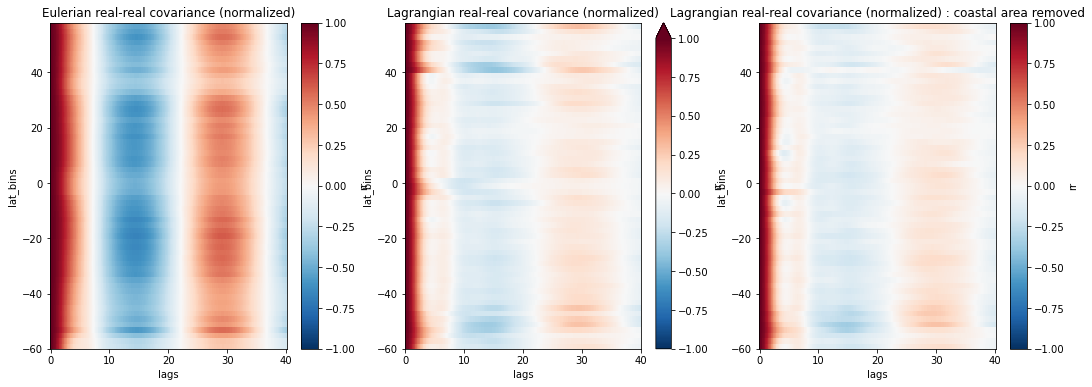

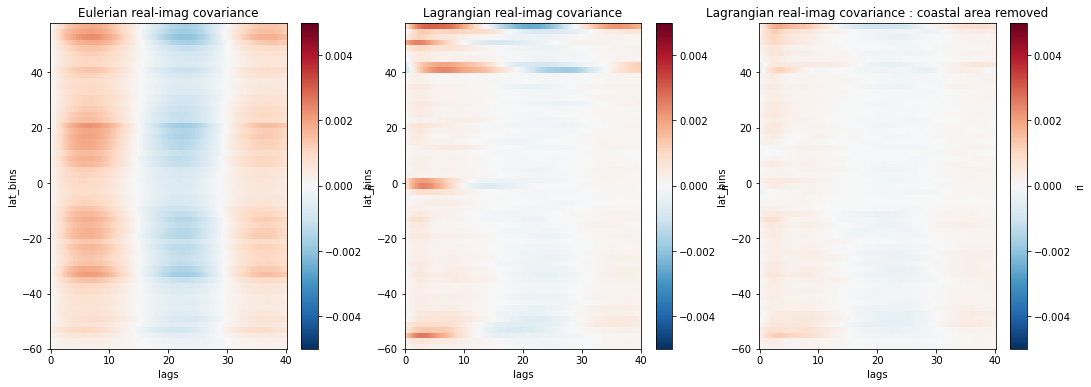

In [24]:
fig,axs = plt.subplots(1,3,figsize=(18,6))
dsE.mean('lon_bins').rr.plot(y='lat_bins',ax=axs[0],vmax=0.005)
dsL.mean('lon_bins').rr.plot(y='lat_bins',ax=axs[1],vmax=0.005)
dsL_flag.mean('lon_bins').rr.plot(y='lat_bins',ax=axs[2],vmax=0.005)
axs[0].set_title('Eulerian real-real covariance')
axs[1].set_title('Lagrangian real-real covariance')
axs[2].set_title('Lagrangian real-real covariance : coastal area removed')

fig,axs = plt.subplots(1,3,figsize=(18,6))
(dsE.mean('lon_bins')/dsE.mean('lon_bins').isel(lags=0)).rr.plot(y='lat_bins',ax=axs[0],vmax=1)
(dsL.mean('lon_bins')/dsL.mean('lon_bins').isel(lags=0)).rr.plot(y='lat_bins',ax=axs[1],vmax=1)
(dsL_flag.mean('lon_bins')/dsL_flag.mean('lon_bins').isel(lags=0)).rr.plot(y='lat_bins',ax=axs[2],vmax=1)
axs[0].set_title('Eulerian real-real covariance (normalized)')
axs[1].set_title('Lagrangian real-real covariance (normalized)')
axs[2].set_title('Lagrangian real-real covariance (normalized) : coastal area removed')

fig,axs = plt.subplots(1,3,figsize=(18,6))
dsE.mean('lon_bins').ri.plot(y='lat_bins',ax=axs[0],vmax=0.005)
dsL.mean('lon_bins').ri.plot(y='lat_bins',ax=axs[1],vmax=0.005)
dsL_flag.mean('lon_bins').ri.plot(y='lat_bins',ax=axs[2],vmax=0.005)
axs[0].set_title('Eulerian real-imag covariance')
axs[1].set_title('Lagrangian real-imag covariance')
axs[2].set_title('Lagrangian real-imag covariance : coastal area removed')

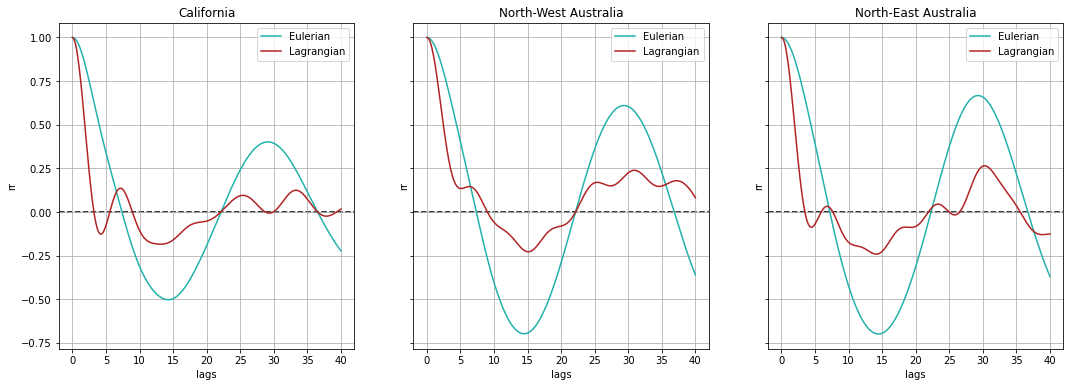

In [40]:
bbox = [bbox_cal,bbox_nwa,bbox_nea,bbox_swa,bbox_med,bbox_eq,bbox_pac]
titles = ['California', 'North-West Australia','North-East Australia',
          'South-West Australia','Mediterranean sea','Equator (Pacific ocean)','Pacific ocean']
fig,ax = plt.subplots(1,len(bbox[:3]),figsize=(6*len(bbox[:3]),6),sharey=True)
for i,title in zip(range(len(bbox[:3])),titles[:3]):
    (dsE/dsE.isel(lags=0)).sel(lat_bins=bbox[i][1],lon_bins=bbox[i][0],method='nearest').rr.plot(ax=ax[i],c='lightseagreen',label='Eulerian')
    (dsL_flag/dsL_flag.isel(lags=0)).sel(lat_bins=bbox[i][1],lon_bins=bbox[i][0],method='nearest').rr.plot(ax=ax[i],c='firebrick',label='Lagrangian')
    ax[i].grid();ax[i].legend()
    ax[i].set_title(title)
    ax[i].axhline(0,c='k',zorder=0,linestyle='--')
fig.savefig('/Users/zcaspar/codes/mit4320/autocov_01.pdf')

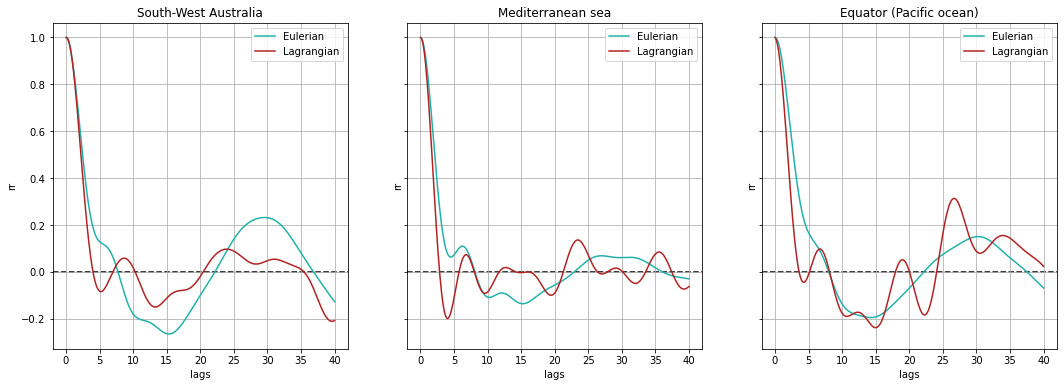

In [41]:
fig,ax = plt.subplots(1,len(bbox[3:-1]),figsize=(6*len(bbox[3:-1]),6),sharey=True)
for b,a,title in zip(bbox[3:-1],ax,titles[3:-1]):
    (dsE/dsE.isel(lags=0)).sel(lat_bins=b[1],lon_bins=b[0],method='nearest').rr.plot(ax=a,c='lightseagreen',label='Eulerian')
    (dsL_flag/dsL_flag.isel(lags=0)).sel(lat_bins=b[1],lon_bins=b[0],method='nearest').rr.plot(ax=a,c='firebrick',label='Lagrangian')
    a.grid();a.legend()
    a.set_title(title)
    a.axhline(0,c='k',zorder=0,linestyle='--')
fig.savefig('/Users/zcaspar/codes/mit4320/autocov_001.pdf')

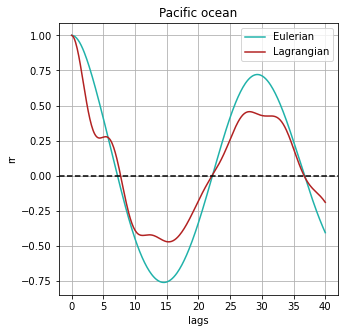

In [44]:
b = bbox_atl
fig,ax = plt.subplots(figsize=(5,5))
(dsE/dsE.isel(lags=0)).sel(lat_bins=b[1],lon_bins=b[0],method='nearest'
                          ).rr.plot(ax=ax,c='lightseagreen',label='Eulerian')
(dsL_flag/dsL_flag.isel(lags=0)).sel(lat_bins=b[1],lon_bins=b[0],method='nearest'
                                        ).rr.plot(ax=ax,c='firebrick',label='Lagrangian')
ax.grid();ax.axhline(0,linestyle='--',c='k');
ax.legend();ax.set_title(titles[-1])
fig.savefig('/Users/zcaspar/codes/mit4320/autocov_1.pdf')

In [23]:
b

[-100, -20]